# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

# Paso 1: Instalación de dependencias

In [138]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import lxml
import html5lib

   Rank                  Song                         Artist  \
0     1       Blinding Lights                     The Weeknd   
1     2          Shape of You                     Ed Sheeran   
2     3               Starboy       The Weeknd and Daft Punk   
3     4     Someone You Loved                  Lewis Capaldi   
4     5             As It Was                   Harry Styles   
..  ...                   ...                            ...   
95   96              Espresso              Sabrina Carpenter   
96   97      Someone Like You                          Adele   
97   98  Too Good At Goodbyes                      Sam Smith   
98   99          Stay with Me                      Sam Smith   
99  100                Havana  Camila Cabello and Young Thug   

    Streams (Billions)       Release date  
0                4.892   29 November 2019  
1                4.416     6 January 2017  
2                3.951  21 September 2016  
3                3.943    8 November 2018  
4          

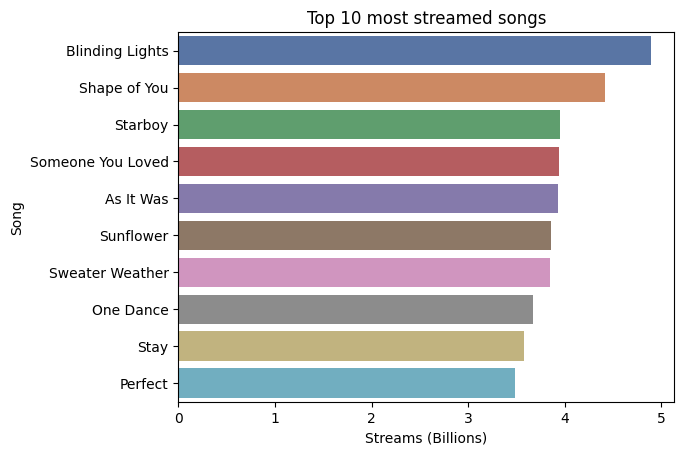

In [139]:
# Paso 1: Instalación de dependencias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

def show_tables(df):
    top_10(df)

    
def top_10(df):
    top_10_df = df.sort_values(by='Streams (Billions)', ascending=False).head(10)
    
    sns.barplot(data=top_10_df, y='Song', x='Streams (Billions)', palette='deep', hue='Song')
    plt.title('Top 10 most streamed songs')
    plt.show()
    return None

# Paso 2: Descargar HTML
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
html_content = None
try:
    response = requests.get(url)
    html_content = response.text
except Exception as e:
    print('An error occured: ', e)

df = None

# Paso 3: Transforma el HTML
if response.status_code == 200 and html_content:
    try:
        tables = pd.read_html(StringIO(html_content))

        if tables:
            df = tables[0]
        else:
            print("No table was found")
    except Exception as e:
        print('An unexpected error occured while trying to get the first table data: ', e)

if df is not None:
    try:
        # Paso 4: Procesa el DataFrame
        df.drop('Ref.', axis=1, inplace=True)
        df.columns = ['Rank', 'Song', 'Artist', 'Streams (Billions)', 'Release date']
        df['Song'] = df['Song'].str.replace('"', '')
        df = df.drop(df.index[-1])
        df['Streams (Billions)'] = pd.to_numeric(df['Streams (Billions)'])
        print(df)
        show_tables(df)
    except Exception as e:
        print(e)
else:
    print('There is no data in the table')
